# Polynomial Multiplication
## Bansharee Ireen

### Credit Statement: I worked alone.

In [1]:
from math import ceil, floor, log
import time
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

## Problem 1: Polynomial Multiplication

### A. Naive Algorithm

In [2]:
def naiveMult(P, Q):
    global runtime
    # degree of both P and Q
    n = len(P)-1
    # the new array with the multiplied coeffecients
    R = []
    
    # until we get k=2n for 2n degree R
    for k in range((2*n)+1):
        # the coeffecient of the current index
        r_k = 0
        
        # the lower and upper bounds of the range for the loop below
        start = 0
        end = k+1
        
        # alter the range only for this case
        if k > n:
            start = k-n
            end = n+1
            
        # multiply coeffecients of P and Q that satisfy the range defined above
        for i in range(start, end):
            # incrementing runtime for multiplication
            runtime += 1
            r_k += P[i]*Q[k-i]
            
        # incrementing runtime again by number of times the results of the above multiplication got added to each other
        runtime += end - start - 1
        
        R.append(r_k)
    
    return R

### B. Karatsuba's Algorithm

In [3]:
def KaratMultPoly(P, Q):
    global runtime
    # degree of both P and Q
    n = len(P)-1
    
    # base case: if small enough, use naive algorithm
    if n < 2:
        return naiveMult(P, Q)
    
    # split the arrays
    m = ceil(n/2)
    
    P1 = []
    Q1 = []
    for i in range(m):
        # incrementing runtime for 2 additions each iteration
        runtime += 2
        P1.append(P[i] + P[m+i])
        Q1.append(Q[i] + Q[m+i])
        
    # add the m-th element based on the case
    # case when n = 2m
    if n > (2*m - 1):
        P1.append(P[n])
        Q1.append(Q[n])
    # otherwise just pad with 0
    else:
        P1.append(0)
        Q1.append(0)        
    
    # getting the values recursively
    # all three should have length less than 2m+1
    R1 = KaratMultPoly(P[:m], Q[:m])
    R2 = KaratMultPoly(P[m:], Q[m:])
    R3 = KaratMultPoly(P1, Q1)
    
    pad = 2*m + 1          # the limit for padding
    # pad the above three arrays until they have 2m length
    while len(R1) < pad:
        R1.append(0)
    while len(R2) < pad:
        R2.append(0)
    while len(R3) < pad:
        R3.append(0)
    
    R4 = []
    R = []
    
    for i in range(2*m + 1):
        # incrementing runtime for two subtractions
        runtime += 2
        R4.append(R3[i] - R1[i] - R2[i])
        
    for i in range(2*n + 1):
        r1 = 0
        r2 = 0
        r4 = 0
        
        if i < len(R1):
            r1 = R1[i]
            
        if (i-(2*m)) < len(R2) and (i-(2*m)) >= 0:
            r2 = R2[i-(2*m)]
            
        if (i-m) < len(R4) and (i-m) >= 0:
            r4 = R4[i-m]
        
        R.append(r1 + r4 + r2)
    
    return R

In [4]:
# some test cases, also tested against my own calculations
test = False
runtimeTest = False

runtime = 0
if runtimeTest:
    KaratMultPoly([1, 1], [2, 3])
    print(runtime)

if test:
    failed = 0
    inputs = [[5, 8, -61, 1000, 7, -90], [500, -76, 1, -1000, 70, 10],
              [4, -4, -22, 1, -25], [2, -3, 4, 9, 3], 
              [1, 3, 1, 2], [2, 1, 2, 1],
              [3, 2, 1], [1, 3, 4],
              [-1, 2, -8], [17, -9, 3]]
    
    while inputs:
        inp0 = inputs.pop()
        inp1 = inputs.pop()
        naiveRes = naiveMult(inp0, inp1)
        karatRes = KaratMultPoly(inp0, inp1)
        print(karatRes)
        if naiveRes != karatRes:
            failed += 1
    
    if failed > 0:
        print("Failed " + str(failed) + "/" + str(len(inputs)) + " test cases")
    else:
        print("Passed all test cases!")

        

### C. Sum of Squares of Coeffecients of Pi

In [5]:
# assumption: using pi file provided on Canvas, must be placed in same dir as the notebook

# this function is taken from the helper.py file on Canvas
# has been modified for this assignment

# input: positive integer
# output: array containing the digits in pi
def read_pi(n):
    if n < 1:
        print('Error: requires a positive integer.')
        return []
    
    #opens the file name "pi" and reads the first n digits
    #puts it in the list pi, and returns that list
    pi = list()
    f = open('pi','r')
    
    for i in range(n):
        d = f.read(1)
        pi.append(int(d))
    f.close()
    
    return pi

In [6]:
# input, n: the nth degree of the pi polynomial
# output: sum of the squares of the squared polynomial
def squarePi(n):
    # for nth degree, we need (n+1) digits of pi
    k = n+1
    pi = read_pi(k)
    # square them
    r = KaratMultPoly(pi, pi)
    
    # add their squares
    sum = 0
    for x in r:
        sum += x**2
    
    return sum

### Input Question 1

In [7]:
print(squarePi(20000))

2193109171093891


**Answer:** $S_{20000} = 2193109171093891$

### D. Time

#### D.i.

In [8]:
# calculates time taken to run Karatsuba implementation
# input: the pi array to multiply
# output: the time taken using .time()
#
def karatTime(pi):
    before = time.time()
    r = KaratMultPoly(pi, pi)
    after = time.time()
    
    return after-before

# calculates time taken to run naive implementation
# input: the pi array to multiply
# output: the time taken using .time()
#
def naiveTime(pi):
    before = time.time()
    r = naiveMult(pi, pi)
    after = time.time()
    
    return after-before

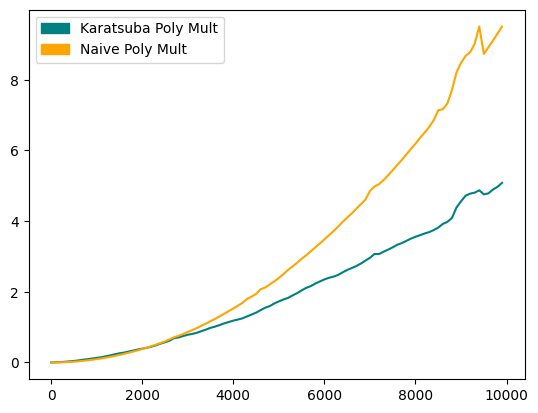

In [9]:
# plots the graph
# inputs:
#        * X: the x coordinates of both the plots
#        * Y1: the y coordinates of the first plot
#        * Y2: the y coordinates of the second plot
#        * label2: the label on the legend for the second plot
#        * label1: the label on the legend for the first plot
# output: nothing returned, plot displayed
#
def plot(X, Y1, Y2, label2='Naive Poly Mult', label1='Karatsuba Poly Mult'):
    plt.plot(X, Y1, color='teal')       # first plot
    plt.plot(X, Y2, color='orange')     # second plot
    
    # creating the patches for the legend
    teal_patch = mpatches.Patch(color='teal', label=label1)
    orange_patch = mpatches.Patch(color='orange', label=label2)
    
    # the legend
    plt.legend(handles=[teal_patch, orange_patch])
    
    plt.show()
    

# algorithm time taken comparison using .time()
# inputs:
#        * n: upper bound of the x axis (it must start at 1)
#        * jumps: the x value intervals of the x coordinates
# output: 2 plots
#        * X-axis: numbers 1 to n indicating the size of the pi array
#        * Y-axis: time taken by the two implementations
#
# teal plot: time taken using karatsuba multiplication to run as array size increases
# orange plot: time take for naive multiplication to run as array size increases
#
def graph1(n, jumps):
    X = list()
    karatY = list()    # y values for the karatsuba plot
    naiveY = list()    # y values for the naive plot

    
    for i in range(1, n+1, jumps):
        X.append(i)
        
        # get the array for the i+1th digits of pi
        k = i + 1
        pi = read_pi(k)
        
        # input karatsuba time taken as y value
        karat = karatTime(pi)
        karatY.append(karat)
        
        # input naive time taken as other y value
        naive = naiveTime(pi)
        naiveY.append(naive)
    
    plot(X, karatY, naiveY)
    
graph1(10000, 100)

### D.i Input Question
**Answer:** $n \approx 2100$ 

## D.ii.

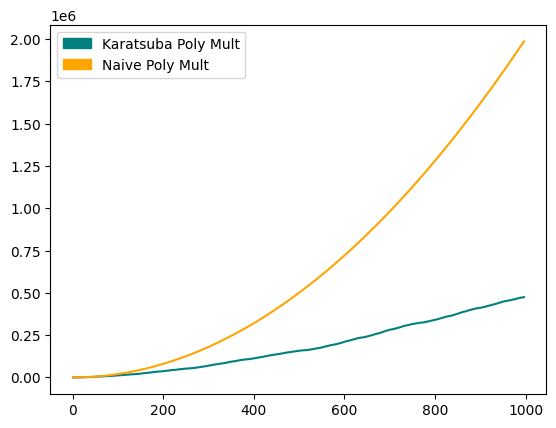

In [10]:
# the global runtime
runtime = 0

# algorithm time taken comparison using operations runtime
# inputs:
#        * n: upper bound of the x axis (it must start at 1)
#        * jumps: the x value intervals of the x coordinates
# output: 2 plots
#        * X-axis: numbers 1 to n indicating the size of the pi array
#        * Y-axis: time taken by the two implementations
#
# teal plot: time taken using karatsuba multiplication to run as array size increases
# orange plot: time take for naive multiplication to run as array size increases
#
def graph2(n, jumps):
    global runtime
    X = list()
    karatY = list()    # y values for the karatsuba plot
    naiveY = list()    # y values for the naive plot

    
    for i in range(1, n+1, jumps):
        X.append(i)
        
        # get the array for the i+1th digits of pi
        k = i + 1
        pi = read_pi(k)
        
        # reset runtime and add it to y karat values
        runtime = 0 
        r = KaratMultPoly(pi, pi)
        run1 = runtime
        karatY.append(runtime)
        
        # reset to 0 against to add new runtime to naive values
        runtime = 0
        r = naiveMult(pi, pi)
        run2 = runtime
        naiveY.append(runtime)
    
    plot(X, karatY, naiveY)
    
graph2(1000, 5)

### D.ii Input Question
**Answer:** $n \approx 25$

## D.iii.

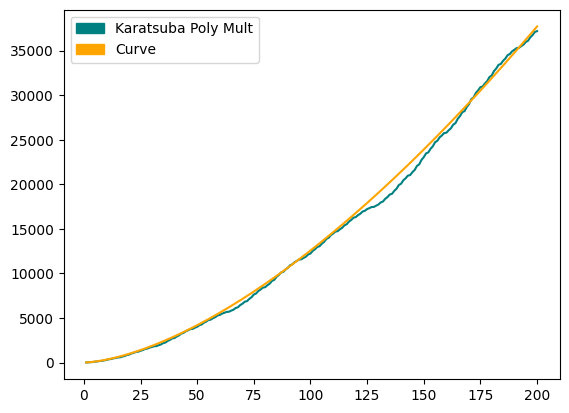

In [11]:
# resetting the global runtime
runtime = 0

# find the constant C that allows the curve to match that of the Karatsuba polynomial multiplication
# input, C: the constant for the curve
# output: graph of the two curves closely matched
#
def findC(C):
    global runtime
    
    if C <= 0:
        return None
    
    # X-axis: numbers 1 to n indicating the size of the pi array
    # Y-axis: time taken by the two implementations
    X = list()
    karatY = list()    # y values for the karatsuba plot
    curveY = list()    # y values for the curve
    
    for i in range(1, 201):
        X.append(i)
        
        # get the array for the i+1th digits of pi
        k = i + 1
        pi = read_pi(k)
        
        # reset runtime and add it to y karat values
        runtime = 0 
        r = KaratMultPoly(pi, pi)
        karatY.append(runtime)
        
        y = C*(i**(log(3, 2)))
        curveY.append(y)

    plot(X, karatY, curveY, 'Curve')


findC(8.5)

### D.iii Input Question
**Answer:** They match when $C \approx 8$